In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/garethleenderts/stroke-data-engineered/stroke_data_engineered.csv
/kaggle/input/d/garethleenderts/stroke-data-engineered/stroke_data_engineered_2.csv
/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# Here we will model tree-based models

These include:
* Random Forest
* XGBoost
* Adaboost

# Prepare Data

In [2]:
stroke_data = pd.read_csv("../input/d/garethleenderts/stroke-data-engineered/stroke_data_engineered_2.csv")

In [3]:
stroke_data.head()

,id,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,...,age_divided_by_bmi,age_minus_bmi,age_std_dev_type_ratio_avg_glucose_level,avg_glucose_level_times_age_divided_by_bmi_squared,age_times_avg_glucose_level_divided_by_bmi_squared,bmi_times_avg_glucose_level,bmi_std_dev_type_ratio_age,log_bmi,age_plus_avg_glucose_level,avg_glucose_level_times_bmi
0,9046,67.0,228.69,36.600000,1,0,1,1,0,1,...,1.830601,30.400000,1.572054,11.438256,11.438256,8370.054000,0.938454,3.600048,295.69,8370.054000
1,51676,61.0,202.21,29.488793,1,1,0,1,0,0,...,2.068582,31.511207,1.249882,14.184645,14.184645,5962.928853,0.073029,3.384010,263.21,5962.928853
2,31112,80.0,105.92,32.500000,1,0,1,1,0,1,...,2.461538,47.500000,3.573096,8.022343,8.022343,3442.400000,0.400433,3.481240,185.92,3442.400000
3,60182,49.0,171.23,34.400000,1,1,0,1,0,1,...,1.424419,14.600000,0.441205,7.090209,7.090209,5890.312000,0.783083,3.538057,220.23,5890.312000
4,1665,79.0,174.12,24.000000,1,1,0,1,0,0,...,3.291667,55.000000,2.711039,23.881042,23.881042,4178.880000,0.553365,3.178054,253.12,4178.880000


In [4]:
from sklearn.model_selection import train_test_split
# Split data in half, one training set, and one test set
X_train, X_test, y_train, y_test = train_test_split(stroke_data.drop(columns=["id", "stroke"]),
                                                    stroke_data['stroke'], 
                                                    test_size=0.5, 
                                                    random_state=125)

# Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

##### Hyperparameter Optimization for Random Forest

GridSearchCV scoring metrics can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [6]:

# param_grid = {'max_depth': [10,20,30,40,50, 100],
#              'n_estimators': [100,200,300,400,500,1000],
#              'max_leaf_nodes':[5,10,20,100]}

# model = RandomForestClassifier()
# # grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_log_error', cv=10) ‘f1_weighted’
# # grid = GridSearchCV(model, param_grid, scoring='f1', cv=10)
# grid = GridSearchCV(model, param_grid, scoring='recall', cv=10)

In [7]:
# %%time
# grid.fit(X_train, y_train)

# took 15min 2s to run
# "f1" took 14min 54s to run

In [8]:
# grid.best_params_

**End of hyperparameter optimization**

Best Parameters: {'max_depth': 10, 'max_leaf_nodes': 5, 'n_estimators': 100}

"recall" {'max_depth': 40, 'max_leaf_nodes': 100, 'n_estimators': 100}

Now build model with best parameters.

In [9]:
model = RandomForestClassifier(max_depth=40, 
                               max_leaf_nodes=100,
                               n_estimators=100)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, max_leaf_nodes=100)

In [10]:
predictions = model.predict(X_test)

**Analysis of Performance for Random Forest**

* confusion_matrix
* classification_report

In [11]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2428
           1       0.17      0.02      0.03       127

    accuracy                           0.95      2555
   macro avg       0.56      0.51      0.50      2555
weighted avg       0.91      0.95      0.93      2555



Text(0.5, 1.0, 'Confusion Matrix for RandomForestClassifier Prediction')

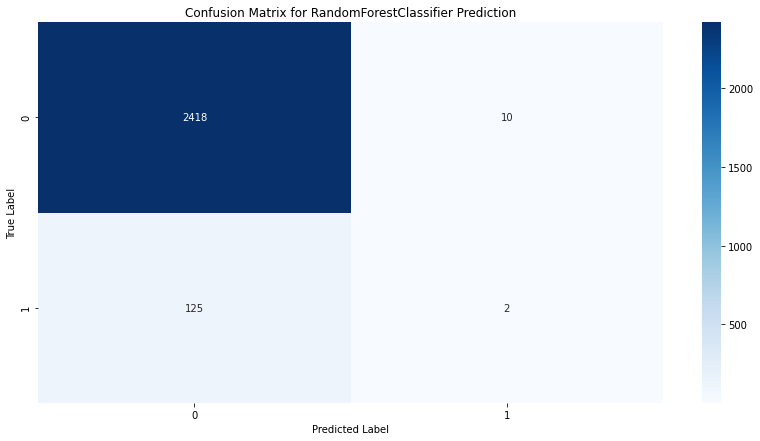

In [12]:
rf_conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(14,7))
sns.heatmap(rf_conf_matrix, annot=True, fmt='g', cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for RandomForestClassifier Prediction")

# XGBoost

In [13]:
from xgboost import XGBClassifier

#### Hyperparameter Optimization

In [14]:
# xgb_param_grid = {
#  "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
# }
# # xgb_model = XGBClassifier()
# xgb_model = XGBClassifier(learning_rate=0.02, 
#                           n_estimators=600, 
#                           objective='binary:logistic',
#                           use_label_encoder=False,
# #                           silent=True, 
#                           nthread=1)
# # grid = GridSearchCV(xgb_model, xgb_param_grid, scoring='neg_mean_squared_log_error', cv=10)

# # grid = GridSearchCV(xgb_model, xgb_param_grid, scoring='roc_auc', cv=10)

# randomized_search = RandomizedSearchCV(xgb_model, xgb_param_grid, scoring='recall', cv=10)


In [15]:
# %%time
# # grid.fit(X_train, y_train)


# randomized_search.fit(X_train, y_train)


In [16]:
# grid.best_params_
# randomized_search.best_params_

**End of hyperparameter optimization for XGBoost**

Best parameters: {'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [17]:
xgb_model = XGBClassifier(max_depth= 3,
                          learning_rate=0.15, 
                          min_child_weight=3, 
                          gamma=0.1, 
                          colsample_bytree=0.3, 
                          n_estimators=600, 
                          objective='binary:logistic',
                          use_label_encoder=False)#, 
#                           nthread=1)

xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)


[18:46:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [18]:
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2428
           1       0.09      0.03      0.05       127

    accuracy                           0.94      2555
   macro avg       0.52      0.51      0.51      2555
weighted avg       0.91      0.94      0.92      2555



Text(0.5, 1.0, 'Confusion Matrix for XGBoost Classifier Prediction')

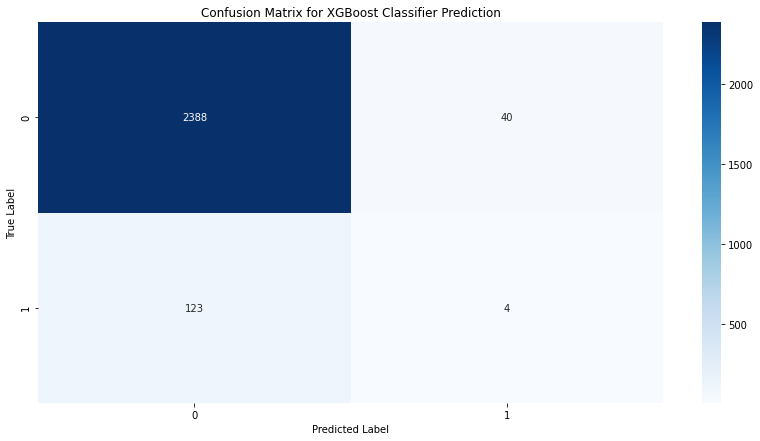

In [19]:
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

plt.figure(figsize=(14,7))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='g', cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost Classifier Prediction")

# Adaboost

In [20]:
from sklearn.ensemble import AdaBoostClassifier

#### Hyperparameter Optimization for Adaboost

In [21]:
# adaboost_param_grid = {"learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0] ,
#                        "n_estimators": [10, 50, 100, 500, 1000],
#                       }

# adaboost_model = AdaBoostClassifier()

# # ada_grid = GridSearchCV(adaboost_model, adaboost_param_grid, scoring='neg_mean_squared_log_error', cv=10)
# ada_random = RandomizedSearchCV(adaboost_model, adaboost_param_grid, scoring='recall', cv=10)

In [22]:
# %%time
# ada_random.fit(X_train, y_train)

In [23]:
# ada_random.best_params_

**End of hyperparameter optimization for AdaBoost**

Best Parameters: {'n_estimators': 500, 'learning_rate': 0.001}

{'n_estimators': 1000, 'learning_rate': 1.0}

In [24]:
adaboost_model = AdaBoostClassifier(learning_rate=1.0, n_estimators=1000)

adaboost_model.fit(X_train, y_train)

adaboost_predictions = adaboost_model.predict(X_test)

In [25]:
print(classification_report(y_test, adaboost_predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2428
           1       0.07      0.04      0.05       127

    accuracy                           0.93      2555
   macro avg       0.51      0.51      0.51      2555
weighted avg       0.91      0.93      0.92      2555



Text(0.5, 1.0, 'Confusion Matrix for AdaBoost Classifier Prediction')

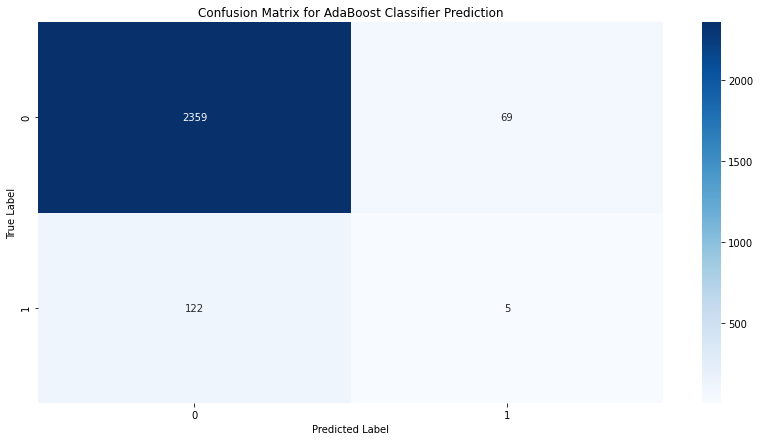

In [26]:
ada_conf_matrix = confusion_matrix(y_test, adaboost_predictions)

plt.figure(figsize=(14,7))
sns.heatmap(ada_conf_matrix, annot=True, fmt='g', cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for AdaBoost Classifier Prediction")

# Ensemble

In [27]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
rf_pred = predictions.tolist()
xgb_pred = xgb_predictions.tolist()
ada_pred = adaboost_predictions.tolist()

ensemble_predictions = []
for i in range(len(rf_pred)):
    total = rf_pred[i] + xgb_pred[i] + ada_pred[i]
    
    if total != 0:
        ensemble_predictions.append(1)
    else:
        ensemble_predictions.append(0)

ensemble_predictions = np.array(ensemble_predictions)

In [29]:
print(classification_report(y_test, ensemble_predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2428
           1       0.09      0.06      0.07       127

    accuracy                           0.92      2555
   macro avg       0.52      0.51      0.52      2555
weighted avg       0.91      0.92      0.92      2555



Text(0.5, 1.0, 'Confusion Matrix for Ensemble Classifier Prediction')

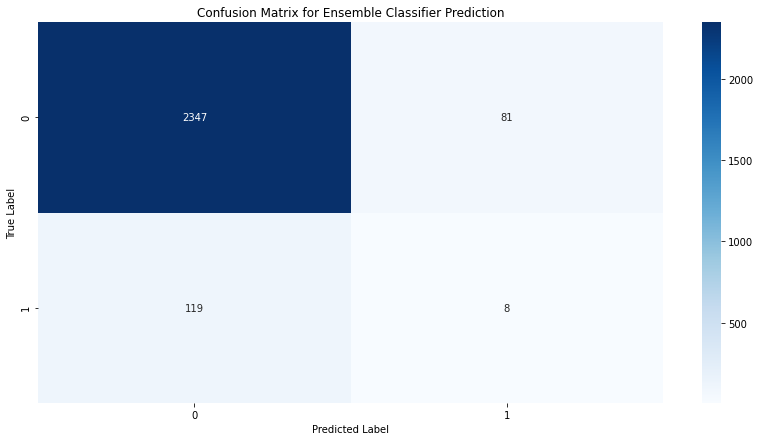

In [30]:
ensemble_conf_matrix = confusion_matrix(y_test, ensemble_predictions)

plt.figure(figsize=(14,7))
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='g', cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Ensemble Classifier Prediction")

## Would regressors with a low threshold work better?

In [31]:
threshold = 0.3

### RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'max_depth': [10,20,30,40,50, 100],
             'n_estimators': [100,200,300,400,500,1000],
             'max_leaf_nodes':[5,10,20,100]}

rf_reg_model = RandomForestRegressor()
# # grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_log_error', cv=10) ‘f1_weighted’
# # grid = GridSearchCV(model, param_grid, scoring='f1', cv=10)
# grid = GridSearchCV(model, param_grid, scoring='recall', cv=10)

rf_reg_random = RandomizedSearchCV(rf_reg_model, param_grid, scoring='neg_mean_squared_log_error', cv=10)

In [33]:
# %%time
# # grid.fit(X_train, y_train)
# rf_reg_random.fit(X_train, y_train)

In [34]:
# rf_reg_random.best_params_

**Best parameters:** {'n_estimators': 400, 'max_leaf_nodes': 5, 'max_depth': 10}

In [35]:
model = RandomForestRegressor(max_depth=10, 
                              max_leaf_nodes=5,
                              n_estimators=400)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_leaf_nodes=5, n_estimators=400)

In [36]:
rf_reg_predictions = model.predict(X_test)

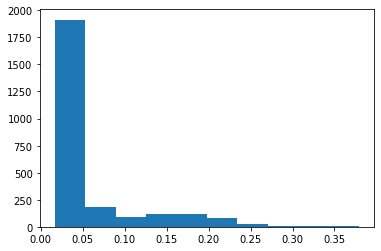

In [37]:
plt.hist(rf_reg_predictions)
plt.show()

In [38]:
def regression_output_converter(reg_predictions, threshold=0.1):
    # Converts predictions above threshold to 1
    # zero otherwise

    predictions = []
    for pred in reg_predictions.tolist():
        if pred > threshold:
            predictions.append(1)
        else:
            predictions.append(0)

    predictions = np.array(predictions)
    
    return predictions

In [39]:
rf_predict = regression_output_converter(rf_reg_predictions, threshold=0.05)

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2428
           1       0.17      0.02      0.03       127

    accuracy                           0.95      2555
   macro avg       0.56      0.51      0.50      2555
weighted avg       0.91      0.95      0.93      2555



Text(0.5, 1.0, 'Confusion Matrix for Random Forest Regressor Prediction')

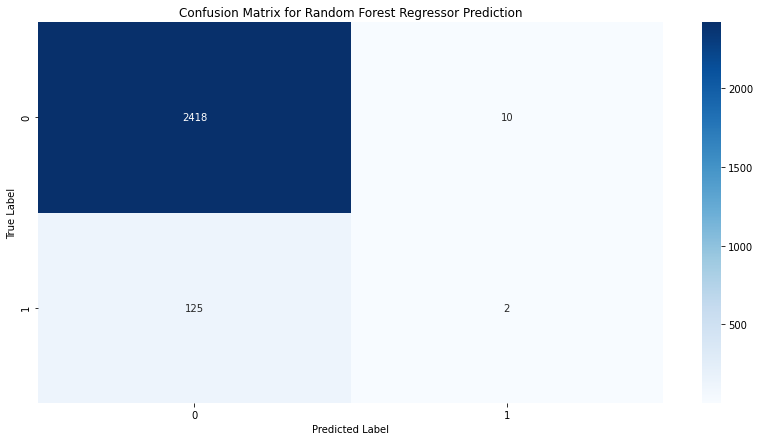

In [41]:
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(14,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Regressor Prediction")

### XGBoost Regressor

In [42]:
from xgboost import XGBRegressor

In [43]:
xgb_param_grid = {
 "learning_rate"    : [0.005, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}
# # xgb_model = XGBRegressor()
xgb_model = XGBRegressor(n_estimators=600) #, 
#                           objective='binary:logistic',
#                           use_label_encoder=False,
# #                           silent=True, 
#                           nthread=1)
# # grid = GridSearchCV(xgb_model, xgb_param_grid, scoring='neg_mean_squared_log_error', cv=10)

# # grid = GridSearchCV(xgb_model, xgb_param_grid, scoring='roc_auc', cv=10)

grid = RandomizedSearchCV(xgb_model, xgb_param_grid, scoring='neg_mean_squared_log_error', cv=10)

In [44]:
# %%time
# grid.fit(X_train, y_train)

In [45]:
# grid.best_params_

**Best params:** {'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.005,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [46]:
xgb_model = XGBRegressor(min_child_weight=5, 
                         max_depth=3, 
                         learning_rate=0.005,
                         gamma=0.2, 
                         colsample_bytree=0.7
                        )

xgb_model.fit(X_train, y_train)

predict = xgb_model.predict(X_test)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


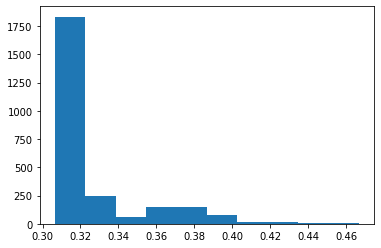

In [47]:
plt.hist(predict)
plt.show()

In [48]:
predictions = regression_output_converter(predict, threshold=0.32)

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2428
           1       0.13      0.76      0.22       127

    accuracy                           0.74      2555
   macro avg       0.56      0.75      0.53      2555
weighted avg       0.94      0.74      0.81      2555



Text(0.5, 1.0, 'Confusion Matrix for XGBoost Regressor Prediction')

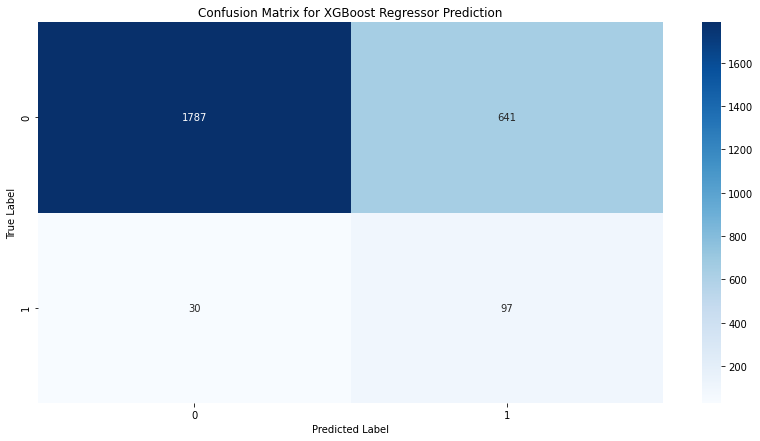

In [50]:
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(14,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost Regressor Prediction")

### Adaboost Regressor

In [51]:
from sklearn.ensemble import AdaBoostRegressor

In [52]:
adaboost_param_grid = {"learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0] ,
                       "n_estimators": [10, 50, 100, 500, 1000],
                       "loss": ["linear", "square", "exponential"],
                      }

adaboost_model = AdaBoostRegressor()

# ada_grid = GridSearchCV(adaboost_model, adaboost_param_grid, scoring='neg_mean_squared_log_error', cv=10)
ada_grid = RandomizedSearchCV(adaboost_model, adaboost_param_grid, scoring='neg_mean_squared_log_error', cv=10)

In [53]:
# %%time
# ada_grid.fit(X_train, y_train)

CPU times: user 2min 52s, sys: 238 ms, total: 2min 52s
Wall time: 2min 52s


RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000]},
                   scoring='neg_mean_squared_log_error')

In [54]:
# ada_grid.best_params_

{'n_estimators': 50, 'loss': 'linear', 'learning_rate': 0.001}

**Best params:** {'n_estimators': 50, 'loss': 'linear', 'learning_rate': 0.001}

In [61]:
ada_model = AdaBoostRegressor(n_estimators=50, 
                              loss='linear', 
                              learning_rate=0.001)

ada_model.fit(X_train, y_train)

ada_predict = ada_model.predict(X_test)

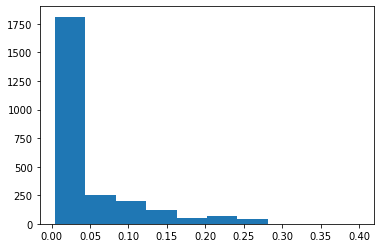

In [62]:
plt.hist(ada_predict)
plt.show()

In [63]:
ada_predictions = regression_output_converter(ada_predict, threshold=0.05)

In [64]:
print(classification_report(y_test, ada_predictions))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      2428
           1       0.14      0.74      0.23       127

    accuracy                           0.75      2555
   macro avg       0.56      0.75      0.54      2555
weighted avg       0.94      0.75      0.82      2555



Text(0.5, 1.0, 'Confusion Matrix for AdaBoost Regressor Prediction')

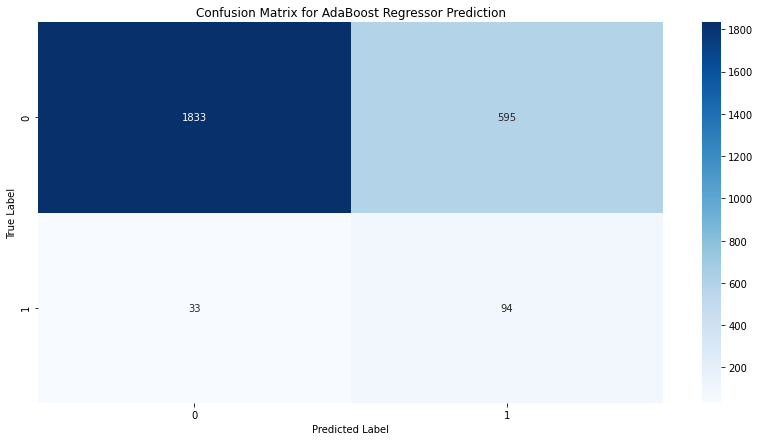

In [65]:
conf_matrix = confusion_matrix(y_test, ada_predictions)

plt.figure(figsize=(14,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for AdaBoost Regressor Prediction")